Customers Overview:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


C:\Users\shree\AppData\Local\Temp\ipykernel_12348\1480704442.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='Region', y='Count', palette="viridis")


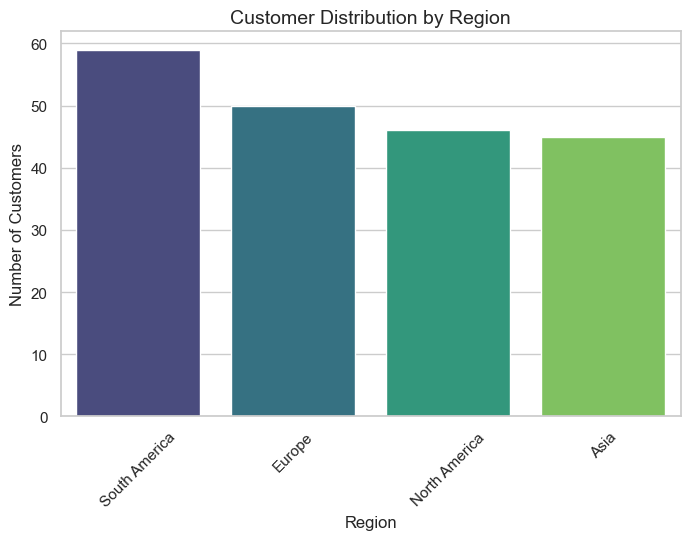

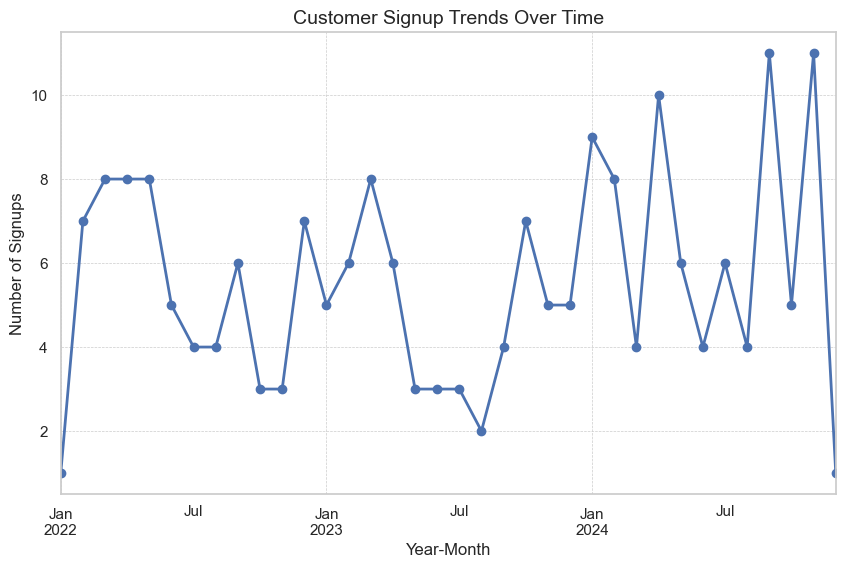


Products Overview:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


C:\Users\shree\AppData\Local\Temp\ipykernel_12348\1480704442.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)


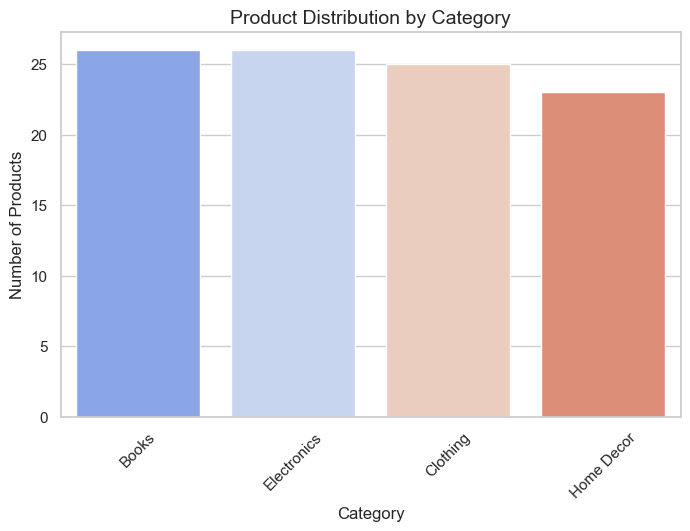

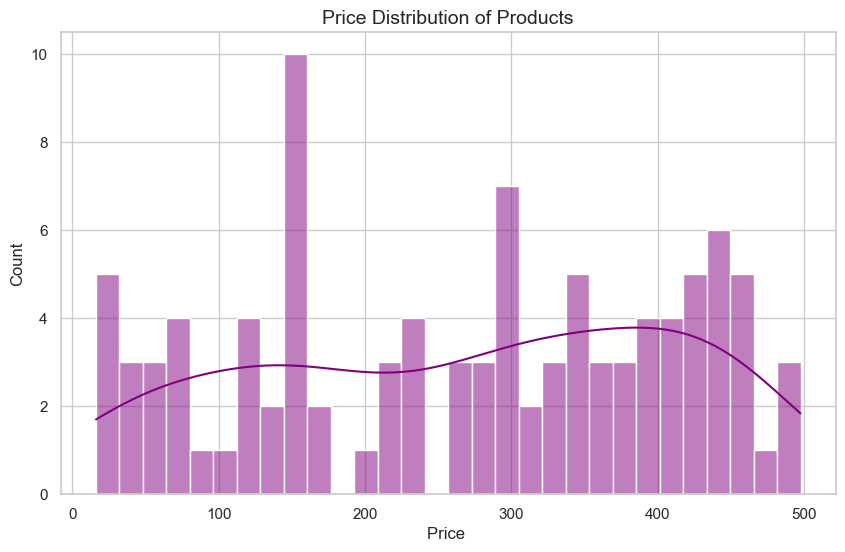


Transactions Overview:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639

Top 5 Most Sold Products:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


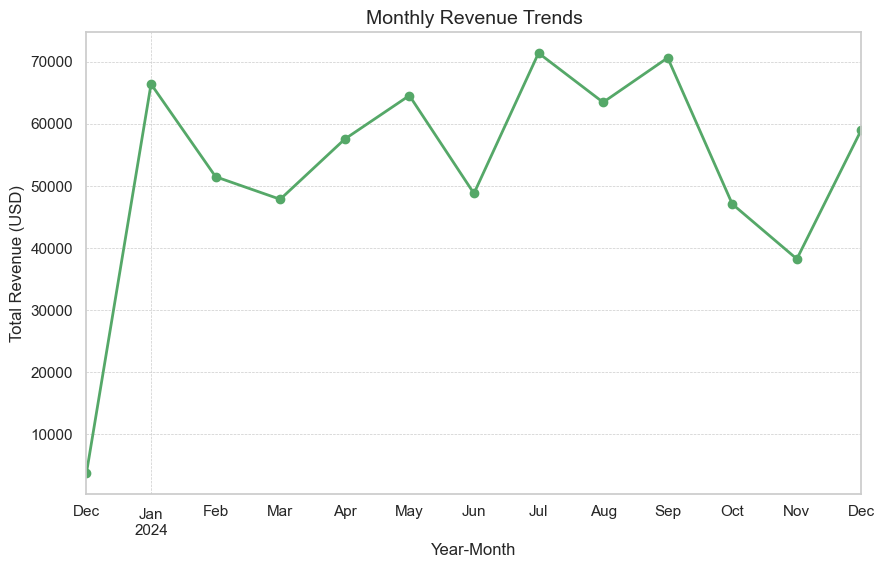


Top 5 Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Fix TotalValue discrepancies
transactions['ComputedTotal'] = transactions['Quantity'] * transactions['Price']
transactions.loc[transactions['TotalValue'] != transactions['ComputedTotal'], 'TotalValue'] = transactions['ComputedTotal']
transactions.drop(columns=['ComputedTotal'], inplace=True)

# Customers EDA
print("Customers Overview:")
print(customers.describe())
print("\nRegion Distribution:")
print(customers['Region'].value_counts())

plt.figure(figsize=(8, 5))
region_counts = customers['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
sns.barplot(data=region_counts, x='Region', y='Count', palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Signup trends
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Customer Signup Trends Over Time", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Products EDA
print("\nProducts Overview:")
print(products.describe())
print("\nCategory Distribution:")
print(products['Category'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)
plt.title("Product Distribution by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, bins=30, color='purple')
plt.title("Price Distribution of Products", fontsize=14)
plt.xlabel("Price ", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()

# Transactions EDA
print("\nTransactions Overview:")
print(transactions.describe())
print("\nTop 5 Most Sold Products:")
most_sold = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print(most_sold)

# Monthly revenue
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('YearMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='g', linestyle='-', linewidth=2)
plt.title("Monthly Revenue Trends", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Top customers by revenue
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Revenue:")
print(top_customers)

In [10]:
# Business Insights (Example)
print("\nBusiness Insights:")
print("1. The majority of customers are from South America, making it the key region for targeted marketing and expansion.")
print("2. Signups have been increasing over time, peaking during certain months.")
print("3. Certain product categories (e.g., Books and Electronics) dominate sales, suggesting customer preferences or competitive pricing in these categories.")
print("4. Revenue shows seasonal peaks, highlighting high-demand periods where marketing and inventory strategies can be optimized.")
print("5. A few customers contribute the most to revenue, suggesting high-value targets.")


Business Insights:
1. The majority of customers are from South America, making it the key region for targeted marketing and expansion.
2. Signups have been increasing over time, peaking during certain months.
3. Certain product categories (e.g., Books and Electronics) dominate sales, suggesting customer preferences or competitive pricing in these categories.
4. Revenue shows seasonal peaks, highlighting high-demand periods where marketing and inventory strategies can be optimized.
5. A few customers contribute the most to revenue, suggesting high-value targets.
